In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


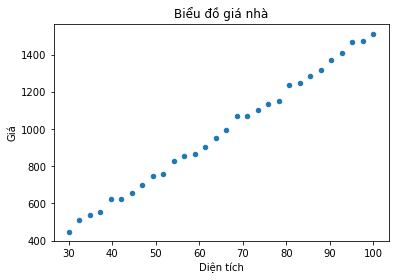

In [4]:
data = pd.read_csv('data_linear.csv')
plo = data.plot.scatter(x='Diện tích', y='Giá').set_title('Biểu đồ giá nhà')

13929872.64455245
2217712.7069988097
355740.34965620865
59728.24664126795
12668.917181838051
5187.529301679128
3998.151899338913
3809.0639077106184
3778.999635090615
3774.21658918526
3773.452694979121
3773.3277564984783
3773.3043979316026
3773.2971885030656
3773.292546623926
3773.2883131242565
3773.2841447441892
3773.279986913009
3773.275830955181
3773.271675491507
3773.267520302687
3773.263365353886
3773.259210639498
3773.255056158643
3773.2509019111935
3773.2467478970975
3773.242594116318
3773.2384405688877
3773.2342872547506
3773.2301341739185
3773.2259813263586
3773.221828712077
3773.2176763310663
3773.2135241832702
3773.2093722687227
3773.2052205874043
3773.2010691392775
3773.1969179243442
3773.1927669425863
3773.188616193993
3773.1844656785493
3773.180315396268
3773.1761653470853
3773.1720155310372
3773.167865948084
3773.163716598206
3773.1595674813957
3773.15541859768
3773.1512699469895
3773.147121529321
3773.142973344702
3773.1388253930745
3773.1346776744417
3773.1305301887946


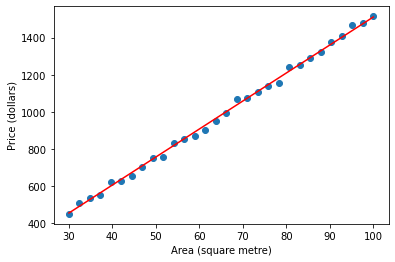

Gia cua nha 50 m^2 la: 755.683
Gia cua nha 100 m^2 la: 1511.189
Gia cua nha 150 m^2 la: 2266.695


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data_linear.csv').to_numpy()
n = data.shape[0]
x_init = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x_init, y)
plt.xlabel('Area (square metre)')
plt.ylabel('Price (dollars)')

# add 1's in the 0th column of x
x = np.zeros((x_init.shape[0], x_init.shape[1] + 1), dtype=x_init.dtype)
x[:, 0] = 1
x[:, 1:] = x_init

w = np.array([0., 1.]).reshape(-1, 1)

alpha = 1e-5
max_iter = 100
for i in range(1, max_iter):
    diff = np.dot(x, w) - y
    cost = 0.5 * np.sum(diff * diff)
    w[0] -= alpha * np.sum(diff)
    w[1] -= alpha * np.sum(np.multiply(diff, x[:, 1].reshape(-1, 1)))
    print(cost)

pred = np.dot(x, w)
plt.plot((x[0][1], x[n-1][1]), (pred[0], pred[n-1]), 'r')
plt.show()

area = [50, 100, 150]
for a in area:
    print(f'Gia cua nha {a} m^2 la:', round((w[0] + w[1] * a).item(), 3))

In [12]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data_2 = pd.read_csv('housing.csv.xls',header=None,delimiter=r'\s+', names=column_names)
data_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
X = data_2.drop('MEDV', axis=1).values
y = data_2['MEDV'].values
N = data_2.shape[0]

In [15]:
y = y.reshape(-1, 1)
y.shape

(506, 1)

In [16]:
ones = np.ones(shape=N).reshape(-1,1)
X = np.concatenate((ones, X), 1)
X

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [18]:
from numpy.linalg import inv
coeficient = inv(X.T @X)@X.T @y
coeficient

array([[ 3.64594884e+01],
       [-1.08011358e-01],
       [ 4.64204584e-02],
       [ 2.05586264e-02],
       [ 2.68673382e+00],
       [-1.77666112e+01],
       [ 3.80986521e+00],
       [ 6.92224640e-04],
       [-1.47556685e+00],
       [ 3.06049479e-01],
       [-1.23345939e-02],
       [-9.52747232e-01],
       [ 9.31168327e-03],
       [-5.24758378e-01]])

In [30]:
def prediction(case):
    b_0 = coeficient[0]
    other_b = coeficient[1:]
    predict = b_0
    for x_i, b_i in zip(case, other_b):
        prediction += (b_i * x_i)
        return predict

In [ ]:
prediction(X[0])